In [3]:
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA PREPROCESSING**

**Test set Image Processing**

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3121 files belonging to 36 classes.


**Validation set Image Processing**

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


**Building Model**

In [7]:
cnn = tf.keras.models.Sequential()

**Building Convolution Layer**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:

cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [14]:

cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [15]:

cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [16]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [17]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [34]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 160s 2s/step - loss: 3.5500 - accuracy: 0.0397 - val_loss: 3.5406 - val_accuracy: 0.0456
Epoch 2/32
98/98 [==============================] - 155s 1s/step - loss: 3.5237 - accuracy: 0.0535 - val_loss: 3.4878 - val_accuracy: 0.0655
Epoch 3/32
98/98 [==============================] - 155s 2s/step - loss: 3.5433 - accuracy: 0.0426 - val_loss: 3.5593 - val_accuracy: 0.0370
Epoch 4/32
98/98 [==============================] - 155s 1s/step - loss: 3.5298 - accuracy: 0.0474 - val_loss: 3.5316 - val_accuracy: 0.0484
Epoch 5/32
98/98 [==============================] - 149s 1s/step - loss: 3.4986 - accuracy: 0.0606 - val_loss: 3.4336 - val_accuracy: 0.0883
Epoch 6/32
98/98 [==============================] - 155s 2s/step - loss: 3.4412 - accuracy: 0.0779 - val_loss: 3.4025 - val_accuracy: 0.0883
Epoch 7/32
98/98 [==============================] - 160s 2s/step - loss: 3.4247 - accuracy: 0.0843 - val_loss: 3.2780 - val_accuracy: 0.1396
Epoch 8/32
98

Evaluating Model

In [35]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 93s 869ms/step - loss: 0.1750 - accuracy: 0.9513
Training accuracy: 0.9512976408004761


In [22]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 14s 335ms/step - loss: 3.5102 - accuracy: 0.0513
Validation accuracy: 0.05128205195069313


**Saving Model**

In [36]:
cnn.save('trained_model.h5')

In [37]:
training_history.history #Return Dictionary of History

{'loss': [3.5499608516693115,
  3.5237441062927246,
  3.5433316230773926,
  3.5297749042510986,
  3.4986255168914795,
  3.4411728382110596,
  3.4247307777404785,
  3.3736958503723145,
  3.303727626800537,
  3.1944739818573,
  3.0311074256896973,
  2.778510332107544,
  2.482705593109131,
  2.2473275661468506,
  1.9787876605987549,
  1.715615153312683,
  1.4574339389801025,
  1.2503087520599365,
  1.1823283433914185,
  0.9917173385620117,
  0.8644596338272095,
  0.7601547241210938,
  0.7038223743438721,
  0.6416993141174316,
  0.5465331673622131,
  0.5735817551612854,
  0.5022726058959961,
  0.4816482961177826,
  0.5492274165153503,
  0.505490243434906,
  0.4523070752620697,
  0.4170598089694977],
 'accuracy': [0.03973085433244705,
  0.053508490324020386,
  0.04261454567313194,
  0.047420699149370193,
  0.06055751442909241,
  0.07785966247320175,
  0.08426786214113235,
  0.09484139829874039,
  0.11150272190570831,
  0.14642742276191711,
  0.17654597759246826,
  0.24991989135742188,
  0.3

In [38]:
#Recording history in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [39]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Calculating Accuracy of Model Achieved on Validation set**

In [40]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.16239356994629 %


# Accuracy Visualization

Training Visualization

In [41]:
#training_history.history['accuracy']

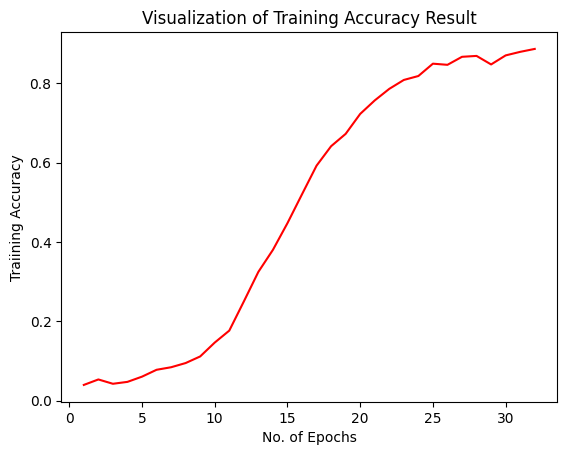

In [43]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

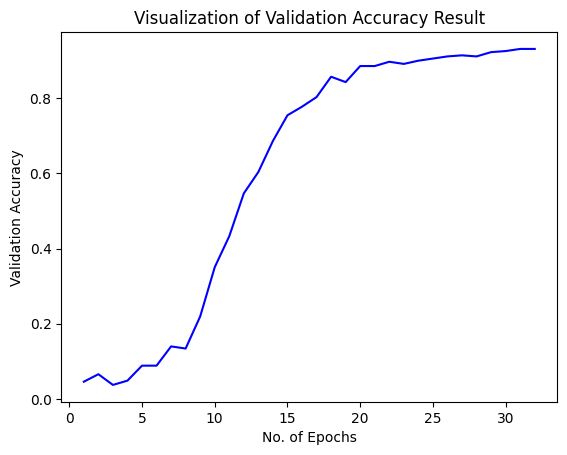

In [44]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test set Evaluation

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [46]:

test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 104s 2s/step - loss: 0.4422 - accuracy: 0.9331
Test accuracy: 0.9331476092338562


# **TESTING DATA **

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

Visualising and Performing Prediction on Single image

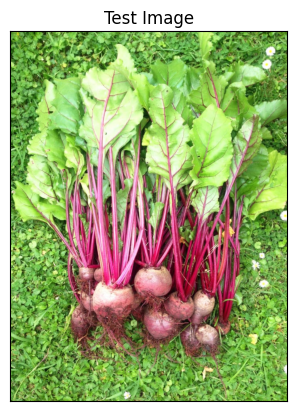

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/test/beetroot/Image_3.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 252ms/step


In [ ]:
print(predictions)

[[6.67692581e-03 1.73378829e-02 6.88830912e-01 2.58464366e-03
  1.05203837e-02 1.00986008e-02 9.54821892e-03 2.08575442e-03
  1.07573131e-02 2.78571695e-02 8.27571552e-04 3.01801483e-03
  1.80556928e-03 1.30323665e-02 2.71586375e-03 4.88487538e-04
  1.75211439e-03 3.29585717e-04 1.86418678e-04 2.18779664e-03
  5.17700054e-03 5.58716303e-04 6.70353090e-03 3.04046599e-03
  4.25262423e-03 1.67249199e-02 1.67347444e-03 1.72947510e-03
  7.73952901e-02 9.82312020e-03 8.72030287e-05 3.10607757e-02
  6.94212504e-04 8.29346885e-04 2.27327961e-02 4.87555098e-03]]


In [ ]:
# test_set.class_names

In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


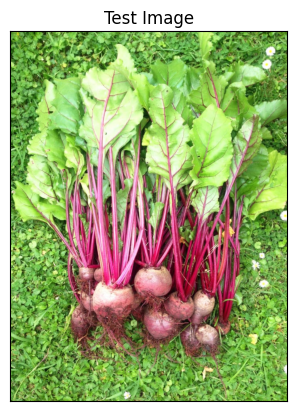

In [ ]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a beetroot
